<img src="images/keepcoding.png" width=200 align="left">

# Regresión lineal

Sabemos que la relación lineal entre dos variables es una situación común en el mundo real, y muy presente en multitud de problemas en ciencia de datos.

- Precio de una vivienda en función de sus m2 y número de habitaciones 
- Sueldo en función de los años de experiencia
- Ganancias de una empresa en función del dinero invertido en publicidad
- Tiempo que tarda en entrar en erupción un géiser en función del tiempo que ha estado en erupción

<img src="images/erupcion.png" style="width: 900px;" align="center"/>


## 1. Introducción

En estadística, un **modelo de regresión** busca estimar la relación entre una variable dependiente y una independiente. La forma más simple que puede tomar este modelo es la regresión lineal.

En el plano, podemos imaginar esta relación como una recta: 

<center>$y = w_0 + x \cdot w_1$</center><br>

donde:

- y es la variable dependiente
- x es la variable independiente
- $w_i$,  $i=0,1$ son parámetros que determinaremos a partir de los datos

Además, ya conocemos el significado de los parámetros:

- $w_0$ es el término independiente o punto de corte con el eje y
- $w_1$ es la pendiente de la recta

En dimensiones mayores, la visualización del hiperplano es más dificil y la forma general se escribe:

<center>$y = w_0 + x_{1} \cdot w_1 + x_{2} \cdot w_2 + ... + x_{n} \cdot w_n$</center>

donde:

- y es la variable dependiente
- $x_i$, $i=1,...,n$ son variables independientes
- $w_i$,  $i=0,...,n$ son parámetros que determinaremos a partir de los datos

En este caso, el parámetro $w_0$ sigue dándonos una idea del término independiente, y los restantes de la "pendiente" para cada variable

<img src="images/Linear_regression.png" style="width: 340px;" align="center"/>


<img src="images/regresion-lineal-multiple.webp" style="width: 340px;" align="center"/>


## 2. Método de mínimos cuadrados

La intuición que tenemos es que si nuestros puntos no están alineados, no va a ser posible resolver el sistema lineal. Por tanto, lo que queremos es resolver un sistema lineal aproximado, que sí que tenga solución. Además, este sistema lineal queremos que sea lo más parecido posible al inicial.

El método de mínimos cuadrados (o least squares) es la primera forma de resolver este problema documentada. Este método minimiza la suma del cuadrado de las distancias verticales entre las respuestas observadas en la muestra y las respuestas del modelo. El parámetro resultante puede expresarse a través de una fórmula sencilla, especialmente en el caso de una única variable independiente.

Una forma de expresar esto de forma matemática es: 

<center>$\DeclareMathOperator*{\argmin}{argmin} w_{LS} = \argmin _w \sum_{i=1}^n (y_{i} - f(x_{i}; w))^2$</center><br>

Si desarrollamos dicha fórmula podemos llegar a la ecuación de **mínimos cuadrados** en forma matricial [que podéis ver desarrollada aquí](http://pillowlab.princeton.edu/teaching/statneuro2018/slides/notes03b_LeastSquaresRegression.pdf):

<center>$X^{T}X W'=X^{T}y$</center><br>

O lo que es lo mismo:<br>
<center>$W'=(X^{T}X)^{-1}X^{T}y$</center>
    
Donde la matrix $X$ viene definida como:

<center>$
  X =
  \left[ {\begin{array}{cc}
   1 & x_{11} & ... & x_{1d} \\
   1 & x_{21} & ... & x_{2d} \\
   ... & ... & ... & ... \\
   1 & x_{nd} & ... & x_{nd} \\
  \end{array} } \right]
$</center><br>

Se le añade un $1$ a cada fila de la matriz por convención y por la componente $w_0$ de la ecuación, quedando una matriz en $\mathbb{R}^{(n)x(d+1)}$.


Es necesario que $n > d$, es decir, que el **número de observaciones** sea mayor que el **el número de dimensiones** para que el cálculo de la matriz inversa sea posible.


Estamos intentando resolver un sistema que, salvo que los datos se ajusten perfectamente a una recta (algo muy fácil con dos puntos pero que se va haciendo más dificil a medida que añadimos más), el sistema que hemos planteado no va a tener solución, es decir, va a ser incompatible.

Lo que buscamos es una solución aproximada, que además minimice el error que estamos cometiendo al hacer esta aproximación. Veamos un ejemplo sencillo:

In [7]:
# Recta y = 4+3x a la que añadimos algo de ruido
import numpy as np
X = 2*np.random.rand(100, 1)
y = 4+3*X+0.2*np.random.randn(100,1)

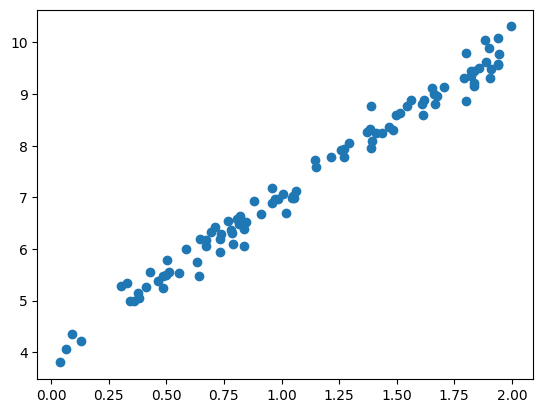

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [9]:
X_b = np.c_[np.ones((100,1)), X]
print(X_b[:5])

[[1.         1.48462785]
 [1.         1.85826282]
 [1.         1.88357863]
 [1.         0.81574699]
 [1.         1.94570459]]


In [12]:
w_hat = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
w_hat

array([[4.04171765],
       [2.96813937]])

A medida que aumentamos el número de datos y de dimensiones, calcular esta "forma cerrada" se hace menos viable, por lo que utilizamos una regresión más estadística. Otra forma de hacerlo más eficiente es usar la pseudoinversa en vez de la inversa (SVD). Esto es lo que hace `np.linalg.lstsq`. Además de ser más eficiente, funciona mejor con algunos _edge cases_ como cuando hay variables redundantes.

### 2.1 Regresión polinomial

La relación entre nuestras variables no siempre será lineal, y podemos extender nuestro desarrollo a otras funciones, como los polinomios. En el siguiente ejemplo, parece que una recta no es la mejor solución:

<img src="./images/pol_regresion.png" width=50%>

Podríamos pedir ahora que nuestra salida $y$ sea de la forma:

<img src="./images/pol_regresion2.png" width=50%>

Esto es lo que se denomina `regresión polinomial` usando una función de 3º orden. Se resuelve de la misma forma que la `regresión lineal`, usando: 

<center>$X^{T}X W'=X^{T}y$</center><br>

O lo que es lo mismo:<br>
<center>$W'=(X^{T}X)^{-1}X^{T}y$</center>

La única diferencia es que nuestra matriz $X$ con un polinomio de grado $p$, será de la forma:

<center>$
  X =
  \left[ {\begin{array}{cc}
   1 & x_1 & x_1^2 & ... & x_n^p \\
   1 & x_2 & x_2^2 & ... & x_n^p \\
   1 & ... & ... & ... & ... \\
   1 & x_n & x_n^2 & ... & x_n^p \\
  \end{array} } \right]
$</center>

Donde `p` será el orden de nuestro polinomio.

No queremos tener un modelo demasiado simple, ¡pero tampoco queremos complicar de más nuestra estimación!


<img src="./images/gif-pol-reg.gif" width=50%>


## 3. Optimización 

El método de mínimos cuadrados del apartado anterior nos da una solución aproximada, pero que podemos obtener de forma analítica en casos sencillos. Sin embargo, no es escalable en problemas complejos, como los que nos encontramos en un problema típico de inteligencia artificial.

Aquí entran en juego los métodos numéricos de optimización. Optimizar consiste en buscar un óptimo (un máximo o un mínimo, como los que ya hemos visto en el tema de funciones) de una función, normalmente sujeta a un conjunto de restricciones. Las restricciones pueden ser, por ejemplo:

- Si estamos estimando el precio de una vivienda o de cualquier otro producto, no podrá ser negativo
- Los años de experiencia de una persona estarán entre 0 y 50

En toda optimización necesitamos una **función objetivo** y lo que buscamos es el argumento que hace mínima esa función (*ojo, no el valor mínimo de la misma*). Númericamente, solemos utilizar métodos iterativos.



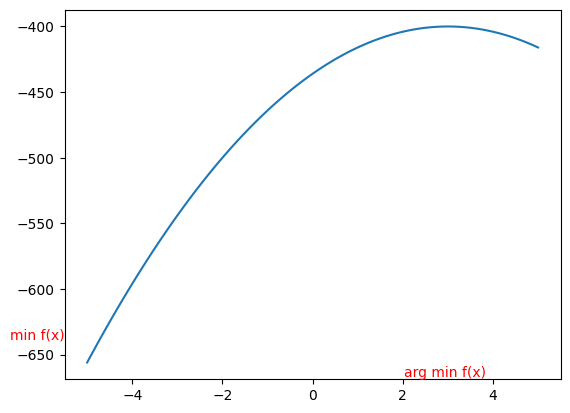

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fix, axs = plt.subplots()

x = np.linspace(-5, 5, 100)

y = -4*(100 + (x-3)**2)

axs.annotate('arg min f(x)',
            xy=(0.85, 0), xycoords='axes fraction',
            xytext=(-0, 0), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',
            color="r")

axs.annotate('min f(x)',
            xy=(0, 0.1), xycoords='axes fraction',
            xytext=(-0, 0), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',
            color="r")

axs.plot(x, y)

### 3.1 Descenso del gradiente

Como hemos visto, optimizar consiste en encontrar un punto óptimo (máximo o mínimo). Cuando tenemos un volumen grande de datos, a este punto óptimo se llega por un proceso iterativo. Cuantas más iteraciones hagamos, más nos acercaremos a la solución. 

Imaginemos que estamos en una montaña y hay mucha niebla, así que no podemos ver nada a nuestro alrededor. Queremos llegar a la base, pero con la niebla lo único que puedes hacer es mover un poco el pie y ver cómo es la pendiente en cada dirección. Una estrategia que podrías seguir es moverte en la dirección en la que veas que hay una pendiente negativa más pronunciada. Cuando no haya pendiente en ninguna dirección, habrás llegado a la base. Esto es similar a cómo funciona el método del descenso del gradiente.

El método del descenso del gradiente, de forma cualitativa, empieza en un punto de la curva de la función f que buscamos minimizar, y se mueve en la dirección en la que la pendiente es mayor, con un paso de tamaño "step size". Esta dirección es $\nabla f(x)$, donde $\nabla$ es el operador gradiente, que está relacionado con las derivadas que vimos en el tema de funciones.

\begin{equation}
    x := x - \eta \cdot \nabla f(x)
\end{equation}

\begin{equation}
    x_t = x_{t-1} - \eta \cdot \nabla f(x)
\end{equation}

El parámetro $\eta$ se denomina **learning rate** y es el parámetro que se encarga de medir el "step size" en cada iteración.


<img src="./images/gradient-descent.png" width=50%>

Podemos ver cómo funciona en esta [demo](https://developers.google.com/machine-learning/crash-course/fitter/graph)

El gradiente es un operador similar a una derivada, porque lo que realmente estamos haciendo algo muy similar a lo que hacíamos con las funciones reales. ¿Qué pasa si queremos buscar un máximo en vez de un mínimo?

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class GD(): 
    def __init__(self, eta=0.1, x0=0, max_iter=50, diff_to_stop=0.01, delta=0.01): 
        self.x0 = x0 #randomly initialize any value
        self.delta = delta #used for gradient calculations
        self.eta = eta #learning rate 
        self.diff_to_stop = diff_to_stop #stop the algorithms if steps are smaller than this value
        self.max_iter = max_iter #when to stop

    def run(self, f, plot_method=None):       
        plt.figure(figsize=(8, 4))
        xx = np.linspace(-10, 10, 100)
        yy = f(xx)
        plt.plot(xx, yy)
        plt.grid()
        
        x_new = self.x0
        iter_no = 0
        while True:
            iter_no += 1

            #main algorithm
            x = x_new #note: x_new is the position of the previous move
            grad = (f(x+self.delta) - f(x))/self.delta #evaluate the gradient at f(x)
            x_new = x - self.eta*grad #move in the direction of gradient
            #end of main algorithm

            if plot_method == 'scatter':
                plt.scatter(x_new, f(x_new), color='r')
            else:
                plt.arrow(x, f(x), x_new-x, f(x_new)-f(x), head_width=0.3, head_length=2, color='r')

            step_size = np.abs(x_new - x)
            if step_size <= self.diff_to_stop:
                print('Successfully converged with a step size of {} after {} iterations!'.format(step_size, iter_no))
                plt.scatter(x_new, f(x_new), s=200, marker='*')
                break
            elif iter_no == self.max_iter:
                print('Max iterations completed! Convergence cannot be guaranteed. Step size={}'.format(step_size))
                plt.scatter(x_new, f(x_new), s=200, marker='*')
                break

Successfully converged with a step size of 0.006022129282428068 after 16 iterations!


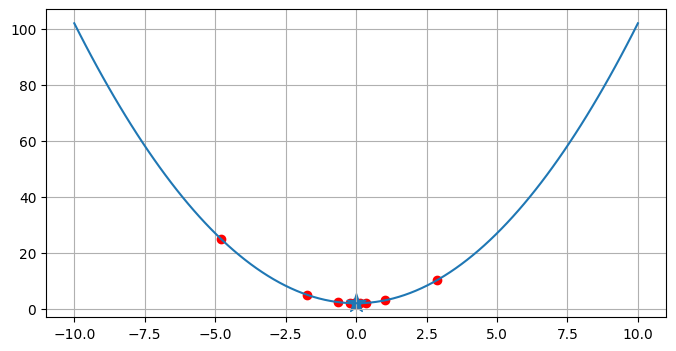

In [35]:
def f(x, p=1, q=0, r=2):
    return p*(x-q)**2 + r

GD(eta=0.8, x0=8, max_iter=100, diff_to_stop=0.01, delta=0.01).run(f, plot_method='scatter')

Max iterations completed! Convergence cannot be guaranteed. Step size=1.6588513082598921


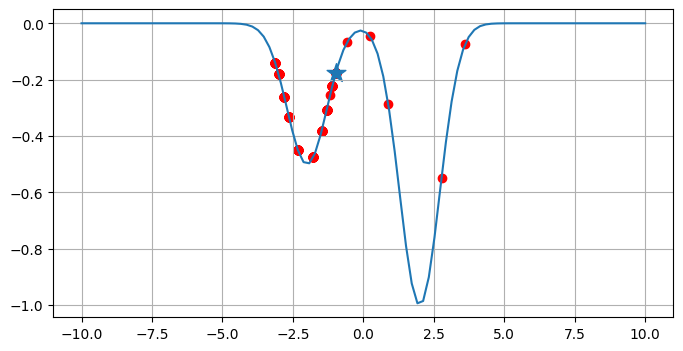

In [48]:
# Local minimum - Alguna solución?
def f_multimodal(x):
    return -np.exp(-(x-2)**2) - 0.5*np.exp(-(x+2)**2)

GD(eta=4, x0=0, max_iter=500, diff_to_stop=0.01, delta=0.1).run(f_multimodal, plot_method='scatter')

### 3.1.1 Operador gradiente

El gradiente es una generalización multivariable de la derivada. Mientras que una derivada se puede definir solo en funciones de una sola variable, para funciones de varias variables, el gradiente toma su lugar. El gradiente es una función de valor vectorial, a diferencia de una derivada, que es una función de valor escalar.

Veamos un ejemplo:

Función de $\mathbb{R}³$ en $\mathbb{R}$

$f(x,y,z) = 3x+y^2 z$


Con el gradiente, obtenemos un vector:
$\nabla(f) = (3, 2 y z, y²)$

## 4. Descenso del gradiente para regresión lineal

Vamos a juntar todo lo anterior y ver si podemos aplicar el descenso del gradiente a la regresión lineal.

Nuestro modelo viene dado por la siguiente ecuación:

$$f(x)=w_0+\tilde{w}^T x.$$

Si añadimos una columna de unos en la matriz X, podemos escribirla como:

$$f (X)= X \cdot w^T  $$

donde w es la matriz formada por los $w_i$, con $i=0,1,...$

Necesitamos una función objetivo para poder optimizar, que va a ser el Residual Sum Squares (RSS):

$$ RSS(w) =  \frac{1}{2} \sum_{n=1}^{N}[y_n-f(x_n)]^2 =  \frac{1}{2} \sum_{n=1}^{N}[y_n- (w_0 + \sum_{d=1}^{D}w_dx_{nd}) ]^2 .$$

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$ 

Y lo que queremos es minimizar esta distancia, para que el modelo se acerque lo máximo posible a los valores verdaderos. Podemos calcular el gradiente y nos queda:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

En resumen, el gradient descendiente para una regresión lineal, se basa en resolver esta ecuación de forma iterativa:

$$w^{t+1} = w^t - \eta \cdot \nabla RSS(w)$$

Para nuestra recta con dos incógnitas (pendiente e intersección con el eje), podemos separarlo en dos ecuaciones:

$$w_0^{t+1} = w_0^t - \eta \cdot \frac{\partial f}{\partial w_0}$$
$$w_1^{t+1} = w_1^t - \eta \cdot \frac{\partial f}{\partial w_1}$$

Donde los subíndices indican el índice del vector w y los superíndices la iteración en la que estamos. Sin embargo, como ya hemos ido viendo, nos interesa *vectorizar* el código en vez de usar bucles en Python, porque va a ser mucho más rápido.

Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.